### Find the values of E and S using a Gaussian fit

The last step of the analysis is to find the E and S values that correspond to the ensemble averages of the dataset. To do so, a Gaussian curve is fitted to the histogram. In case one population appears to be present a single Gaussian fit can be used (section 1). In the case of two populations a double Gaussian fit should be applied (section 2).

In [1]:
import seaborn as sns, numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from pylab import *
from scipy.optimize import curve_fit

#### Section 1: single population

In [3]:
# Paste the copied data that was the result of running script 8
E = pd.Series([0.39484059898081403, 0.30932543354772035, 0.3943098150359954, 0.3689872865237086, 0.2560543137244998, 0.364638211655494, 0.2552963130930909, 0.3987823395539544, 0.34487894232039007, 0.30829441072736136, 0.38401960742593866, 0.06402086580046219, 0.36005240865643107, 0.3673064547458935, 0.45417526776944567, 0.39773596488966567, 0.2283666371409988, 0.3864137049396299, 0.45188499426101525, 0.4283246569460573, 0.3788817416763485, 0.46886543925151686, 0.3690394141842029, 0.3312011337798307, 0.4638015749224876, 0.3349113189027889, 0.4258577552343673, 0.3573115853533292, 0.36705150406100306, 0.4375841145671229, 0.3483647074783102, 0.5331775624762985, 0.27657973811743775, 0.42412299692442434, 0.435275372285046, 0.26228874063332774, 0.2618091287652146, 0.24617967062468735, 0.2621253593680037, 0.3115331357571261, 0.2450590606278059, 0.3847410477868731, 0.2580330236816707, 0.22144981127984895, 0.2173445787717846, 0.3592425974516206, 0.3263358342637185, 0.31279048541540233, 0.28127312460970627, 0.2789139556089698, 0.4017267739673921, 0.3184277225688834, 0.3317651765723785, 0.6058544283780662, 0.3878738319965556, 0.4320497885481608, 0.45080565115624066, 0.32522527419883934, 0.4753969120058322, 0.4114028826500076, 0.45113910373337135, 0.39163649667816564, 0.5668540113790436, 0.39738024195705995, 0.34832124999101133, 0.35381736866352775, 0.23238101255421634, 0.31204224973964334, 0.29369301015106264, 0.3577047444115811, 0.39105998408305026, 0.26153886179001923, 0.33819730387600616, 0.23830621630077728, 0.305370807703771, 0.3615103838518619, 0.4271794207143892, 0.3261529580045846, 0.42747102697490336, 0.23553366701061706, 0.34608113703187676, 0.31908156535888005, 0.39476752943614213, 0.3679567669745074, 0.42347194741753935, 0.2944463033467913, 0.46158846762390604, 0.3560288012998236, 0.36548987553661216, 0.36100983580145823, 0.35389400339762406, 0.21789803843230587, 0.29999750731410507, 0.3986656152924653, 0.31951172681853574, 0.3876851347499278, 0.5047968092706344, 0.36457485996311295, 0.36401990972217574, 0.22790392125985146, 0.374256723108849, 0.32188356627857045, 0.3988370870119492, 0.30257417561350175, 0.3366245175412661, 0.2518191981476617, 0.41540355071471535, 0.2610674570674972, 0.3593305198024902, 0.27461980764021515, 0.31950358538495843, 0.31340499955820716, 0.36294783402995173, 0.4402924082566755, 0.24651496676021456, 0.38865512689465737, 0.3121891197619586, 0.28838474338004416, 0.3422887804555791, 0.2386991543045799, 0.29340749999265076, 0.27941532899561, 0.305489668839507, 0.3715700764620007])
S = pd.Series([0.4409080188024702, 0.5348931753279011, 0.5231161684460403, 0.6428521323571083, 0.5766792911166481, 0.4403198275859803, 0.2897400116702851, 0.47252945510722894, 0.5985334865290498, 0.5874417529162704, 0.5182980145126876, 0.532828281419039, 0.6164090924447011, 0.4059417204561519, 0.7594694175367538, 0.7352291656367931, 0.46524402157927625, 0.4918332525119373, 0.557449486740502, 0.5022554117422664, 0.46690347334491017, 0.4723899069060585, 0.5441559387135443, 0.4799352081869034, 0.488055563352512, 0.560812008705413, 0.6415634647638673, 0.4262903726052574, 0.43797061843497304, 0.46802694959436825, 0.6801142455788642, 0.6500293713011249, 0.5319055448403525, 0.46731813636744124, 0.36264128156957787, 0.3554338439534749, 0.5610065586197686, 0.5464602207478227, 0.5196497587973243, 0.4921116960428078, 0.5600388839757717, 0.6838746344001669, 0.4211310103674433, 0.5764104070338193, 0.5341511743828095, 0.6230161983924679, 0.7113403168763075, 0.4265248656964651, 0.48082326031187733, 0.534934414546434, 0.6143934507200044, 0.45643677624623613, 0.6779519591217226, 0.7026175207551472, 0.3862136843204757, 0.36612434324519194, 0.34427243637663135, 0.39075466143871473, 0.3551721195498509, 0.6063115775531742, 0.5503590395852014, 0.37415981689970107, 0.6196676471203263, 0.4621638396806982, 0.43175287634830345, 0.5174214650206158, 0.6748075680264526, 0.5776491329075794, 0.5355391715086962, 0.6582567063662553, 0.4493073874423989, 0.556311224616293, 0.45667020012779674, 0.39259341216029475, 0.6671464958015736, 0.6455482540737001, 0.5561611982566613, 0.4684261341420753, 0.35977268564707343, 0.477460469189035, 0.4390961752158897, 0.42657970825662833, 0.5384214771061331, 0.5991480920981685, 0.5305030276613348, 0.36674201204531687, 0.4555267685757041, 0.3892317786008984, 0.4735273480470271, 0.4858222782172484, 0.5293380852533813, 0.6061710657182096, 0.4435770422201868, 0.4894528036706598, 0.545563150186344, 0.6010332252505627, 0.5403245926440687, 0.6893428988273936, 0.4220137488652635, 0.4141138836174585, 0.4961511190472703, 0.4669095823171647, 0.42340767033774723, 0.5097838916772784, 0.6015671027470962, 0.5255512301619493, 0.44062058873169563, 0.5582197922585033, 0.4770691307136179, 0.47708016931844166, 0.615893179387568, 0.5355355239140837, 0.32046242945701975, 0.6377521455403352, 0.5765275205802339, 0.4786348960708706, 0.534748384282405, 0.4714231565536597, 0.8093213548313537, 0.4637930691502465, 0.7306956080361439, 0.48086890361056756, 0.536663766517657, 0.4908866616149138])

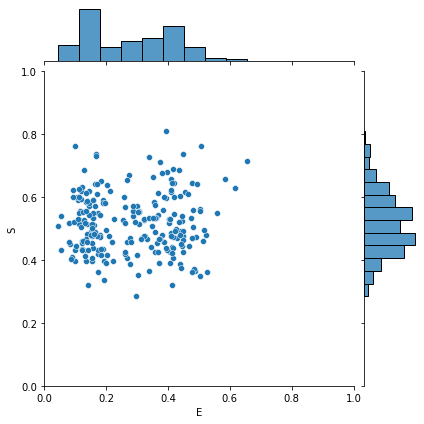

In [25]:
# Initial data exploration using a jointplot (similar to what has been plotted in Mars Rover)
df = pd.DataFrame(zip(E,S), columns = ['E','S'])
sns.jointplot(x='E', y='S', data=df, xlim = [0,1], ylim = [0,1])

Now define the gaussian function and make the fit against all E values. Print the fit parameters and corresponding errors and plot the result for a visual inspection

The fitted peak center lies at E = 0.20041861779798514 
 Sigma: 0.07992060022577856


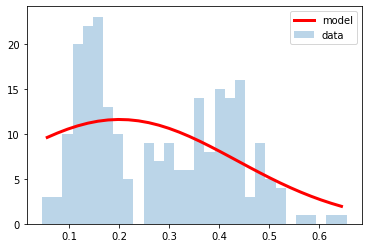

In [26]:
y,x,_=hist(E, 30, alpha=0.3,label="data")
x=(x[1:]+x[:-1])/2 #required to define x as the middle of the box

#Define the gaussian function to fit against
def gauss(x,mu,sigma,A):
    return A*exp(-(x-mu)**2/2/sigma**2)

#Make and plot the fit
expected=(0.25,0.15,33) #expected peak center, width and height (mu, sigma, A)
params,cov=curve_fit(gauss,x,y,expected)
plot(x,gauss(x,*params),color='red',lw=3,label='model')
legend()
sigma=sqrt(diag(cov))
print('The fitted peak center lies at E =',params[0],'\n','Sigma:',sigma[0]) #prints the fit parameters and errors that were found
E_fit = list(params)

The fitted peak center lies at S = 0.504256878269141 
 Sigma: 0.006066007117070314


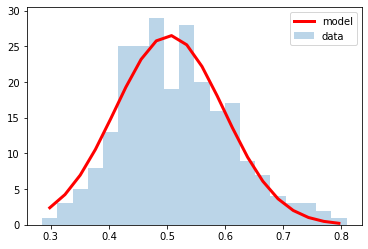

In [27]:
y,x,_=hist(S, 20, alpha=0.3,label="data")
x=(x[1:]+x[:-1])/2 #required to define x as the middle of the box

#Define the gaussian function to fit against
def gauss(x,mu,sigma,A):
    return A*exp(-(x-mu)**2/2/sigma**2)

#Make and plot the fit
expected=(0.5,0.15,18) #expected peak center, width and height (mu, sigma, A)
params,cov=curve_fit(gauss,x,y,expected)
plot(x,gauss(x,*params),color='red',lw=3,label='model')
legend()
sigma=sqrt(diag(cov))
print('The fitted peak center lies at S =', params[0],'\n','Sigma:',sigma[0]) #prints the fit parameters and errors that were found
S_fit = list(params)

#### Section 2: two populations  

In the case of analyzing the 1-lo and 1-mid data together in one archive, the scripts below should be used for fitting. These scripts take into account that two populations are to be expected in the dataset and hence do a double Gaussian fit.

In [10]:
# Paste the copied data that was the result of running script 8
E = pd.Series([0.4459978609665499, 0.35652426872966453, 0.44585638669098765, 0.4199890703777777, 0.2990012279440476, 0.41458044645776554, 0.29560389528181674, 0.45023974055049804, 0.39456469778995074, 0.3556457705388405, 0.4351845436096119, 0.07901635291709784, 0.41056911166278415, 0.4171396884654522, 0.5075040619731828, 0.45001664469955976, 0.26782419761296616, 0.43754640600368566, 0.5047194405872771, 0.480650407907757, 0.429598395160823, 0.5214563418669932, 0.41970465160630127, 0.3795673289275041, 0.5164474247706713, 0.38388903648506206, 0.4785985617799975, 0.40680641732412676, 0.4170907661442837, 0.4899083766633138, 0.39848756267199276, 0.5854732326897691, 0.3211849397947271, 0.47620887103325227, 0.4869140604552483, 0.30423322068651165, 0.3052286419432935, 0.2880110513967351, 0.30536555685518074, 0.358669270485699, 0.2868443571401004, 0.43647616490196706, 0.30021837137857216, 0.2607873023249533, 0.25599675277195166, 0.4097418890838663, 0.37528245812798344, 0.3595953304414308, 0.3259949080130349, 0.32373493264678643, 0.4538235900437646, 0.36582786146851964, 0.38095273258305634, 0.6552620919446331, 0.4384152698722499, 0.4836591991406604, 0.5025071295693192, 0.3725915937847776, 0.527318186512917, 0.4637349339527667, 0.5039443686496862, 0.44221897669554733, 0.6179764417552717, 0.44873940665342804, 0.3973826239862461, 0.4036459578010887, 0.27331325123693107, 0.359618268914295, 0.33972674015909227, 0.40823572150133475, 0.4421365402318667, 0.30491099265773425, 0.38684714783045454, 0.2782254437140348, 0.3527884006562033, 0.4121848387650267, 0.47968945340688524, 0.3741356402214671, 0.4789406275297428, 0.27585514184192705, 0.3950684993456681, 0.36632234767616023, 0.4463910276213578, 0.4187773261016725, 0.47581807542213156, 0.3393441908821244, 0.514081713733072, 0.4051825824244283, 0.41566485635157324, 0.4110392068753837, 0.4037803867128161, 0.25696749937947977, 0.3459839583817088, 0.450202175961258, 0.3674590945764218, 0.4392913169677411, 0.5574013073560676, 0.41550883510437636, 0.4138132896253667, 0.266894681773543, 0.4249330680529992, 0.3695797172564508, 0.4500182302299153, 0.3491565731903964, 0.38585748046102913, 0.2941028304994736, 0.46715376388470564, 0.3044045505672876, 0.40923240763318125, 0.31874354090668444, 0.3677273584767981, 0.36089300094792975, 0.41177343253271576, 0.4932425658398047, 0.2885245253889017, 0.4398039178534775, 0.35958895682379827, 0.33363924166420267, 0.3923828094994283, 0.2792614313319462, 0.3401114815216325, 0.3239790760924746, 0.35242078137396027, 0.42210630765329943, 0.11499565166818917, 0.22304518411104535, 0.14320707847476105, 0.09828588941357728, 0.12437687333747735, 0.1621701232492357, 0.1339170060099962, 0.1567145091751127, 0.1129510289238941, 0.08436171060266934, 0.10191167483674562, 0.13008924364206048, 0.19365673706890865, 0.10912619311275477, 0.10488748256988568, 0.11548644460299194, 0.12514703523807577, 0.10092994656576929, 0.1645175769219595, 0.09289062746652847, 0.19449029129613238, 0.12339712631856876, 0.1520467619898837, 0.04569462054220117, 0.2622225195872186, 0.22577502316831793, 0.09978804633697663, 0.1380121038440126, 0.1529649849775932, 0.18477557641538436, 0.14527363240305236, 0.17327684194510998, 0.15719531380014137, 0.2603191354451674, 0.1294372281015185, 0.17942559472402583, 0.12288512121765323, 0.13573800599825045, 0.1575791691685369, 0.1801504494363039, 0.11131742685203554, 0.12186516078745847, 0.12032313179981806, 0.17355073714935704, 0.11835958528333138, 0.09413226972096098, 0.14557416062311607, 0.12074152088959554, 0.0909136859031278, 0.09603461448126757, 0.1719042094892702, 0.26237983585075025, 0.18992888262474766, 0.13269872489402082, 0.14196789193608894, 0.11905103112952838, 0.13030223151408923, 0.13656899881313536, 0.1380038116545452, 0.08660985335273838, 0.21881229202216412, 0.1911172480795067, 0.1536228633756208, 0.17520613484234387, 0.13588848357063854, 0.1450023861135101, 0.17382416745401916, 0.314402673418851, 0.15533521444409887, 0.11355810414127482, 0.13024089571338798, 0.2675459527341373, 0.12242592268064374, 0.10796726790380226, 0.15165309515482553, 0.2090782361211217, 0.05587774645003739, 0.15723201683398616, 0.18374323650703345, 0.405635524944761, 0.1551487206385365, 0.1797681046843719, 0.13644046851507322, 0.12128330690081703, 0.1995574301390872, 0.1669389756100617, 0.11143880157446873, 0.16378293320636853, 0.15796465979075813, 0.07933092414242393, 0.20324367230074633, 0.15759272963107218, 0.14488776610255036, 0.13829733248681764, 0.16030372061032727, 0.12515273871594512, 0.14298034724899517, 0.190209260876802, 0.16459737678997047, 0.055275768226611705, 0.15418044543998427, 0.1960059789383181, 0.16736169511918006, 0.17057738175946033, 0.21366892997110204, 0.1559242429465998, 0.2033692973093343, 0.13705527989484995, 0.2000737325766533, 0.15675364486007928, 0.13446551356392616, 0.18441905276025175, 0.17103111379772376, 0.15575520626657008])
S = pd.Series([0.4433381206170071, 0.5329804131969753, 0.5257283699273327, 0.6441845363454327, 0.5720321715674177, 0.4411566291877292, 0.28506540340797715, 0.47527291122070286, 0.5986299413942695, 0.5856085691925502, 0.5203562248776896, 0.5172886794242072, 0.6172972545097882, 0.40680237276975867, 0.7638877652101154, 0.7376238001521468, 0.4587860918583786, 0.49396816258900983, 0.5630887363976733, 0.5066358113371563, 0.46857396443002564, 0.4788237283109728, 0.5454542516407994, 0.47908547953383335, 0.4942718742045581, 0.5603248625967822, 0.6456660308714282, 0.4266984399774887, 0.438927558326383, 0.4728052044508749, 0.6804550461271954, 0.6591500438267514, 0.5282116356437291, 0.47138532364276536, 0.366678086886103, 0.3508804703288058, 0.5566054979570372, 0.5411564908291034, 0.5151345875254125, 0.49022503680313784, 0.5547270655897483, 0.6858952643618187, 0.41627917319157204, 0.5698971955366201, 0.527221541880659, 0.6238660593386457, 0.7107159422309676, 0.4245858361850882, 0.47727273196866177, 0.5313757595468056, 0.6173824116512439, 0.45485208859045934, 0.6775123201827329, 0.7140750121851402, 0.3880417326625042, 0.370030968210562, 0.34889228744358075, 0.38940098388079747, 0.361090930551015, 0.6098012079454259, 0.5559663715312156, 0.3761136628079805, 0.6307089551314817, 0.46480165332465245, 0.43170340529046025, 0.5178650982875264, 0.6695913876637039, 0.5759873247793215, 0.5327834240886195, 0.6590366034346692, 0.45156860067669496, 0.5518781749972379, 0.4561448007920175, 0.38673367392087304, 0.6654197226678685, 0.6465137095446789, 0.5605199559972668, 0.46728053141040066, 0.36340344932375074, 0.4714053246962109, 0.43894770265933136, 0.4249737046970921, 0.5410753703862965, 0.6004330225570556, 0.5346638284594352, 0.3637926923552339, 0.46151316173175444, 0.38945255707810295, 0.47450161939581065, 0.48658633029593495, 0.5298073343702954, 0.5996531283499664, 0.44098237057895173, 0.49223427192089936, 0.5442227420606711, 0.6033268176965422, 0.5487157733077653, 0.6904300956098703, 0.4227598261599471, 0.4076628019767613, 0.4976467705495213, 0.4655312490462834, 0.4259755404290363, 0.5074486279780196, 0.6012418647571166, 0.5204880736568316, 0.4441278532566093, 0.5537682330566758, 0.4777228141371601, 0.4731614623995515, 0.6147169822274781, 0.5338441572165352, 0.3207387168125333, 0.6425690738405339, 0.5713672907204317, 0.48085710573456836, 0.5329896888879235, 0.4682436047290633, 0.8094370663517112, 0.45789980664538293, 0.7287059422753706, 0.47721734355044854, 0.5345483018451886, 0.49222720026471145, 0.555476379722893, 0.3963485955881496, 0.5719077706858795, 0.4317265027114743, 0.51880839638342, 0.5124431102452167, 0.584710794352971, 0.5338440873036032, 0.549656396836085, 0.45098950957925604, 0.4449595226705925, 0.43081298299736376, 0.33550408447586383, 0.5924753407586864, 0.5999988160672358, 0.527894501425735, 0.5543430262229238, 0.7637890218324627, 0.5706043674803306, 0.6010086955024332, 0.39733994165127073, 0.5244240037266497, 0.4932204330549876, 0.5070398229098663, 0.4190621610074785, 0.5301445456651389, 0.39648305757088026, 0.5144028398998339, 0.39640513289300894, 0.6523221014708797, 0.5831923750750684, 0.5503263104514171, 0.5351686929656546, 0.42688320721872314, 0.5289108678903032, 0.48094051147382133, 0.43435502629005746, 0.39680080598305173, 0.5919906327673379, 0.47472358862853753, 0.5135859857727448, 0.43216419169611514, 0.5061861687321284, 0.41916092314479325, 0.6183896378828235, 0.6223854426607742, 0.6181897695242159, 0.4609833744771591, 0.40905975505216324, 0.5226341593364822, 0.47635610832636877, 0.5180529036510245, 0.435028790957507, 0.5191732439664307, 0.32084341291064383, 0.5943672065564971, 0.4142749402083138, 0.4670057240439428, 0.48341606315679336, 0.4041358313276202, 0.45893990260497153, 0.5913885457971322, 0.5147650266249679, 0.3610061344217675, 0.6118829348945781, 0.5817681509278153, 0.4315307990940132, 0.4681586545225311, 0.4755146905803045, 0.5994782519201763, 0.6862413816358024, 0.6554735309716079, 0.633329276447732, 0.5309367315881728, 0.48109249416507227, 0.47531076846930514, 0.5389981573282423, 0.5352428364463209, 0.4342073618610025, 0.5318970525570859, 0.4996885063366667, 0.5425983161469831, 0.4657381812595529, 0.45432865882739076, 0.3916860087446075, 0.7383806502506179, 0.6256069992132341, 0.4884805730886776, 0.5510962818721868, 0.4579569375288162, 0.41520174695960044, 0.43729081683357207, 0.542444733030849, 0.5867321928613756, 0.48356263577311187, 0.4603061131720063, 0.4314071860190261, 0.5827055902403856, 0.6427427895074111, 0.4324156374751161, 0.45336662300042596, 0.5810978179256635, 0.7316984008764785, 0.6091342910465312, 0.618848490011941, 0.40650591514599865, 0.6394960503148698, 0.4570589348271128, 0.4947120005876587, 0.5902220854414334, 0.5565879570261513, 0.41651193910515666, 0.6430388787981371, 0.501282916355054])


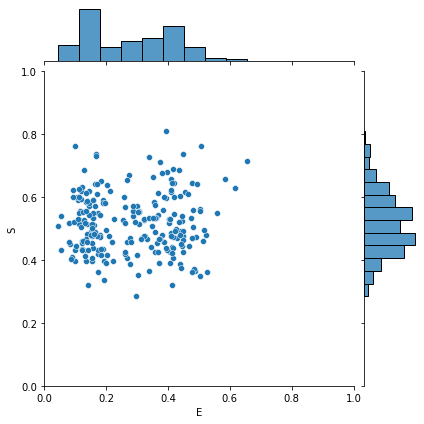

In [11]:
# Initial data exploration using a jointplot (similar to what has been plotted in Mars Rover)
df = pd.DataFrame(zip(E,S), columns = ['E','S'])
sns.jointplot(x='E', y='S', data=df, xlim = [0,1], ylim = [0,1])

Now define the double Gaussian function and make the fit for E. A bimodal fit is not required for S since the jointplot shows no different populations on that axis. To find S use the scripts from section 1. 

The fitted peak center lies at E = 0.14086841438593373 and 0.3913810694714935 
 Sigma: 0.0028312070401120093 and 0.008275510109988778


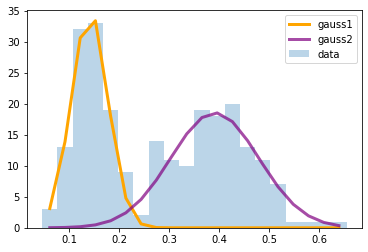

In [21]:
y,x,_=hist(E, bins = 20, alpha=0.3,label="data") #select the appropriate number of bins for the dataset
x=(x[1:]+x[:-1])/2 #required to define x as the middle of the box

#Define the bimodal function to fit against
def gauss(x,mu,sigma,A):   #can be commented out if section 1 has been run as well
    return A*exp(-(x-mu)**2/2/sigma**2)

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

#Make and plot the fit
expected=(0.15,0.15,25,0.45,0.3,15) #expected peak center, width and height (mu, sigma, A) of both peaks
params,cov=curve_fit(bimodal,x,y,expected)
sigma=sqrt(diag(cov))
plot(x,gauss(x,params[0],params[1],params[2]), color='orange', lw=3, label='gauss1')
plot(x,gauss(x,params[3],params[4],params[5]), alpha=0.7, color='purple', lw=3, label='gauss2')
legend()

print('The fitted peak center lies at E =',params[0], 'and', params[3],'\n','Sigma:',sigma[0],'and',sigma[3]) #prints the fit parameters and errors that were found